In [223]:
import pandas as pd
import geopandas as gp
import pdv_functions as pdv
import numpy as np

# VEST PA 2020
---

## VEST Documentation

### Sources

#### Election Results
Election results primarily from individual county precinct reports as processed via OpenElections (https://github.com/openelections/openelections-data-pa/). Precinct data was corrected with canvass reports for the following counties: Cambria, Crawford, Forest, Juniata, York. The Susquehanna County precinct results were provided by the Pennsylvania Secretary of State Bureau of Elections.

Due to court orders involving ballots that were segregated until legal challenges were resolved the certified results from nearly all counties differ from the official results certified by the state. State courts ordered segregated ballots to be included for state offices whereas federal courts ordered that they be excluded for federal offices. As the orders were issued after the county certification deadline these votes were added to the state offices for 57 counties that did not include them in precinct reports and removed from federal offices in 10 counties that did include them in precinct reports. The precinct results in the VEST shapefiles are those that were certified by the respective counties.

Federal ballots in Philadelphia were reported at the citywide level. These are distributed by candidate to precincts based on their share of the precinct-level reported vote.

#### Shapefiles
Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release. The shapefiles from Delaware County and the City of Pittsburgh are from the respective jurisdictions. Precinct numbers were corrected to match the 2020 voter file in the following locales: Allegheny (Elizabeth, Pittsburgh W12), Blair (Greenfield), Bradford (Athens), Greene (Dunkard, Monongahela), Monroe (Smithfield), Montgomery (Hatfield), Northampton (Bethlehem Twp), Perry (Toboyne), Union (Union), Washington (New Eagle, Somerset), York (Fairview). VTD codes in Philadelphia were edited to match the city ward/division numbers.

The U.S. Census Bureau's final VTD release was used for all of Crawford, Jefferson, McKean, Northumberland. A number of precincts statewide were also replaced with the final VTDs due to updated municipal boundaries. 

The final VTD release was also used for precincts that were altered before the 2020 general election in the following locales: Adams (Reading), Allegheny (Marshall), Armstrong (Ford City), Cambria (N Cambria), Centre (State College), Chester (Valley N), Clearfield (Bradford), Franklin (Montgomery, Peters), Greene (Dunkard), Lebanon (Cornwall, Jackson, N Cornwall, S Londonderry, Swatara), Luzerne (Butler, Dallas, Fairview, Kingston Boro, Kingston Twp, Rice, Salem, Sugarloaf, Wright), Lycoming (Williamsport), Mercer (S Pymatuning), Monroe (Jackson), Montgomery (New Hanover, Upper Merion), Northampton (Allen), Philadelphia (Wards 2, 5, 8, 18, 21, 40, 63), Venango (Cranberry), Washington (Amwell, Cecil, Donegal, N Strabane, S Strabane); Westmoreland: (Murrysville), York (W Manheim).

Precinct boundaries throughout the state were edited to match voter assignments in the PA Secretary of State voter file from the 2020 election cycle. While some edits reflect official updates to wards or divisions the majority involve voters incorrectly assigned to voting districts by the counties. As such the VEST shapefile endeavors to reflect the de facto precinct boundaries and these often differ from the official voting district boundaries in some cases quite drastically. Wherever possible edits were made using census boundaries or alternatively using the parcel shapefiles from the respective counties. 

### Processing
In certain areas voter assignments appear so erratic that it is impractical to place all voters within their assigned precinct. These areas were edited so as to place as many voters as possible within their assigned precinct without displacing a greater number from their assigned precinct. In general, municipal boundaries were retained except where a significant number of voters were misassigned to the wrong municipality. In cases where the odd/even split was incorrectly reversed for precinct boundary streets the official boundary was retained. All such cases involved near equal number of voters swapped between voting districts.

The following revisions were made to the base shapefiles to match the de facto 2020 precinct boundaries consistent with the voter file. Individual precincts are noted in cases of splits or merges. Due to the sheer number of edits boundary adjustments are listed at the borough/township level. There may be as many as two dozen individual precincts that were revised within a given municipality.

In some cases the edited precinct boundaries noted below match those of the final Census VTD release.

Adams: Adjust Cumberland, Franklin
Allegheny: Split Pittsburgh W5 11/17; Merge Pittsburgh W16 9/11/12; Align McCandless with municipal boundary; Adjust Baldwin, Bethel Park, Braddock, Brentwood, Castle Shannon, Clairton, Collier, Coraopolis, Crescent, Dormont, Dravosburg, Duquesne, E Deer, E McKeesport, E Pittsburgh, Elizabeth, Emsworth, Forward, Glassport, Hampton, Harmar, Ingram, Jefferson Hills, Kennedy, Leet, Liberty, Marshall, McCandless, McKees Rocks, McKeesport, Monroeville, Moon, Mount Lebanon, Munhall, N Fayette, N Versailles, O'Hara, Oakdale, Penn Hills, Pine, Pittsburgh (nearly all wards), Pleasant Hills, Reserve, Richland, Ross, Scott, Sewickley, Shaler, S Fayette, S Park, Stowe, Swissvale, Upper St. Clair, W Deer, W Homestead, W Mifflin, W View, Whitaker, Whitehall, Wilkins, Wilkinsburg
Armstrong: Align Dayton, Elderton, Ford City, Kittanning, N Apollo with municipal boundaries; Adjust Cowanshannock, Ford City, Gilpin, Kiskiminetas, Kittanning, Manor, N Buffalo, Parks, Parker City, S Buffalo
Beaver: Adjust Aliquippa, Ambridge, Baden, Beaver, Brighton, Center, Chippewa, Conway, Economy, Franklin, Hanover, Harmony, Hopewell, Midland, Monaca, N Sewickley
Bedford: Adjust Bedford Boro, Bedford Twp
Berks: Adjust Cumru, Douglass, Earl, Oley, Maxatawny, Robeson, Sinking Spring, Union
Blair: Merge Tunnelhill/Allegheny Twp 4; Align Altoona, Bellwood, Duncansville, Hollidaysburg, Newry, Roaring Spring, Tyrone, Williamsburg with municipal boundaries; Adjust Allegheny, Altoona, Antis, Frankstown, Freedom, Greenfield, Huston, Juniata, N Woodbury, Logan, Snyder, Tyrone Boro, Tyrone Twp
Bucks: Align Sellersville, Tullytown with municipal boundaries; Adjust Bensalem, Bristol Boro, Bristol Twp, Buckingham, Doylestown Twp, Falls, Hilltown, Lower Makefield N, Lower Southampton E, Middletown, Milford, Morrissville, Newtown Twp, Northampton, Solebury Lower, Solebury, Springfield, Tinicum, Upper Makefield, Upper Southampton E, Warminster, Warrington, W Rockhill
Butler: Align Butler Twp, Valencia with municipal boundaries; Adjust Adams, Buffalo, Butler Boro, Butler Twp, Center, Cranberry E, Cranberry W, Jackson, Jefferson, Zelienople
Cambria: Align Daisytown, Sankertown, W Taylor, Wilmore with municipal boundaries; Adjust Cambria, Conemaugh, Croyle, E Taylor, Ebensburg, E Carroll, Geistown, Jackson, Johnstown W8, W17, W20, Lower Yoder, Northern Cambria, Portage Boro, Portage Twp, Richland, Southmont, Stonycreek, Summerhill, Susquehanna, Upper Yoder, W Carroll, Westmont
Cameron: Adjust Emporium, Shippen
Carbon: Adjust Jim Thorpe, Kidder, Mahoning, New Mahoning, Summit Hill
Centre: Merge Ferguson Northeast 1 A/B; Adjust Benner,  Ferguson, Patton
Chester: Adjust Birmingham, E Bradford S, E Fallowfield, E Goshen, E Marlborough, Easttown, N Coventry, Spring City, Tredyffrin M, Uwchlan, Valley N, W Bradford, W Caln, W Goshen N, W Goshen S, Westtown
Clarion: Align Shippenville with municipal boundary; Merge Emlenton/Richland; Adjust Clarion, Highland, Farmington, Knox
Clearfield: Adjust Decatur, Woodward
Columbia: Merge Ashland/Conyngham; Adjust Orange, Scott West
Crawford: Align Cochranton, Richmond with municipal boundaries
Cumberland: Split Lower Allen 1/Annex; Align Carlisle, E Pennsboro, Hampton, Lemoyne, Lower Allen, Mechanisburg, Middlesex, Mount Holly Springs, N Middleton, Shiremanstown, Silver Spring, W Pennsboro, Wormsleysburg with municipal boundaries
Dauphin: Align Middletown with municipal boundary; Adjust Derry, Harrisburg W1, W7, W8, W9, Hummelstown, Lower Paxton, Lykens, Middletown
Delaware: Adjust Chester, Concord, Darby Boro, Darby Twp, Haverford, Marple, Nether Providence, Newtown, Radnor, Ridley, Sharon Hill, Thornbury, Tinicum, Trainer, Upper Chichester, Upper Darby, Upper Providence
Elk: Adjust Johnsonburg, Ridgeway Boro, Ridgeway Twp, St. Marys
Erie: Adjust Erie W1, W4, W5, W6, Greene, Lawrence Park, McKean, Millcreek, North East
Fayette: Align Dunbar, Uniontown with municipal boundaries; Adjust Brownsville, Bullskin, Dunbar, Georges, German, Luzerne, N Union, Redstone
Franklin: Align Mercersburg with municipal boundary; Adjust Antrim, Fannett, Greene, Guilford, Hamilton, Metal, Peters, Quincy, St. Thomas, Southampton, Washington
Fulton: Align McConnellsburg with municipal boundary
Greene: Align Carmichaels with municipal boundary; Adjust Cumberland, Franklin, Jefferson, Lipencott, Mather, Morgan Chart, Monongahela, Nemacolin
Huntingdon: Adjust Huntingdon, Mount Union
Jefferson: Adjust Punxsutawney
Lackawanna: Adjust Archbald, Blakely, Carbondale, Clarks Summit, Dickson City, Dunmore, Fell, Jermyn, Jessup, Mayfield, Moosic, Old Forge, Olyphant, Scranton W1, W2, W3, W6, W7, W10, W12, W13, W14, W15, W16, W19, W20, W23, S Abington, Taylor, Throop
Lancaster: Split Lancaster 7-8 CV/LS; Adjust Brecknock, Columbia, E Hempfield, E Lampeter, E Petersburg, Elizabethtown, Ephrata, Lancaster W4, W8, Lititz, Manheim, Manor, Millersville, Mt Joy Twp, New Holland, Penn, Providence, Rapho, Warwick, W Cocalico, W Donegal, W Hempfield
Lawrence: Adjust Neshannock
Lebanon: Adjust Cornwall, S Lebanon
Lehigh: Split Allentown Ward 17-4/Parkland; Adjust Lower Macungie, Salisbury
Luzerne: Align Avoca, Pittston with municipal boundaries; Adjust Butler, Exeter, Fairview, Foster, Hanover, Hazle, Jenkins, Larksville, Lehman, Nanticoke, Plains, Smoyersville, W Wyoming, Wilkes-Barre
Lycoming: Adjust Jersey Shore
McKean: Align Foster with municipal boundary; Adjust Bradford, Bradford Twp, Foster, Hamlin, Keating
Mercer: Adjust Delaware, Fredonia, Greenville, Hempfield, Hermitage, Sharon, Sharpsville, W Salem
Mifflin: Split Brown Reedsville/Church Hill
Monroe: Align E Stroudsburg with municipal boundary; Adjust E Stroudsburg, Smithfield, Stroud, Tobyhanna
Montgomery: Adjust Abington, Lower Merion, Pottstown, Springfield, Upper Moreland, Upper Merion, Upper Providence
Northampton: Align Glendon, Walnutport with municipal boundaries; Adjust Bangor, Bethlehem W2, W3, W4, W7, W9, W14, W15, Bethlehem Twp, Bushkill, Easton, Forks, Hanover, Hellertown, Lehigh, Lower Mt Bethel, Lower Saucon, Moore, Nazareth, Palmer, Plainfield, Upper Mt Bethel, Washington, Williams
Northumberland: Adjust Coal, Kulpmont, Marion Heights, Milton, Mount Carmel, Northumberland, Point, Ralpho, Shamokin, Sunbury, Upper Augusta
Philadelphia: Adjust 1-19/21, 5-3/19, 7-2/3/17, 7-6/7, 9-5/6, 15-7/10, 17-20/26, 20-5/10, 21-1/15, 21-40/41, 22-21/26, 23-11/12, 25-9/17, 25-4/7/12, 25-10/12, 26-1/2, 27-7/8, 27-18/20/21, 28-1/8, 29-9/11, 29-10/17, 30-14/15, 31-5/6, 38-11/17, 38-13/20, 38-15/19, 40-12/18/19, 40-17/19, 42-3/4/7, 44-8/14, 50-3/12, 50-11/27, 52-2/6/9, 52-3/8, 57-6/7, 57-10/27, 57-17/28, 58-6/12, 62-5/19, 65-4/7, 65-11/16, 66-22/34
Pike: Adjust Matamoras
Potter: Adjust Galeton
Schuylkill: Adjust Coaldale, N Manheim, Norwegian, Porter, Pottsville
Somerset: Align New Centerville with municipal boundary; Adjust Conemaugh, Jefferson, Middlecreek, Paint, Somerset Boro
Susquehanna: Adjust Montrose; Lanesboro, Susquehanna Depot
Tioga: Adjust Delmar, Wellsboro
Union: Adjust Buffalo, White Deer
Venango: Adjust Cornplanter, Cranberry, Franklin, Oil City, Sugarcreek
Warren: Adjust Conewango
Washington: Align Allenport, Beallsville, Burgettstown, Canonsburg, Carroll, Charleroi, Claysville, Elco, Finleyville, Houston, Long Branch, McDonald, Midway, Monongahela, Speers, Twilight with municipal boundaries; Adjust Amwell, Bentleyville, California, Canonsburg, Canton, Cecil, Centerville, Chartiers, Donora, Fallowfield, Hanover, Independence, Mount Pleasant, N Franklin, N Strabane, Peters, Robinson, Smith, Somerset, S Franklin, Union Washington, W Brownsville
Wayne: Adjust Honesdale
Westmoreland: Align Greensburg with municipal boundary; Adjust Allegheny, Arnold, Bell, Derry, E Huntingdon, Fairfield, Greensburg W1-W8, Hempfield, Jeannette, Latrobe, Ligonier, Lower Burrell, Monessen, Mount Pleasant, New Kensington, N Belle Vernon, N Huntingdon, Penn, Rostraver, St. Clair, Scottdale, Sewickley, S Greensburg, S Huntingdon, Trafford, Upper Burrell, Unity, Vandergrift, Washington, Youngwood
York: Align E Prospect, Goldsboro, Jefferson, Manchester, Monaghan, Wellsville, York with municipal boundaries; Adjust Chanceford, Codorus, Conewago, Dover, Fairview, Hanover, Jackson, Lower Windsor, New Freedom, Newberry, N Codorus, Penn, Red Lion, Shrewsbury, Spring Garden, Springbettsbury, W Manchester, Windsor Boro, Windsor Twp, Wrightsville, York Twp, York W5, W6, W15




### Races

G20PREDBID - Joseph R. Biden (Democratic Party)  
G20PRERTRU - Donald J. Trump (Republican Party)  
G20PRELJOR - Jo Jorgensen (Libertarian Party)  

G20ATGDSHA - Joshua D. Shapiro (Democratic Party)  
G20ATGRHEI - Heather S. Heidelbaugh (Republican Party)  
G20ATGLWAS - Daniel Wassmer (Libertarian Party)  
G20ATGGWEI - Richard L. Weiss (Green Party)  

G20AUDDAHM - Nilofer Nina Ahmad (Democratic Party)  
G20AUDRDEF - Timothy L. DeFoor (Republican Party)  
G20AUDLMOO - Jennifer Lynn Moore (Libertarian Party)  
G20AUDGFAI - Olivia Faison (Green Party)  

G20TREDTOR - Joseph M. Torsella (Democratic Party)  
G20TRERGAR - Stacy L. Garrity (Republican Party)  
G20TRELSOL - Joseph P. Soloski (Libertarian Party)  
G20TREGRUN - Timothy Runkle (Green Party)  

## Election Result Processing

### Load in VEST file

In [224]:
vest_pa_20 = gp.read_file("./raw-from-source/VEST/pa_2020/pa_2020.shp")

In [225]:
cand_columns = [i for i in vest_pa_20.columns if "G20" in i]

<AxesSubplot:>

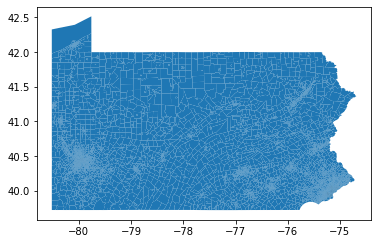

In [226]:
vest_pa_20.plot()

## Compare Against State Totals

Note: We downloaded these from this link: (https://www.electionreturns.pa.gov/)

In [227]:
# Load in Official State Totals
official_county_pa = pd.read_csv("./raw-from-source/Official_4192022114153AM.CSV")

In [228]:
official_county_pa = pd.pivot_table(official_county_pa, index = "County Name", columns = "Candidate Name", values = "Votes", aggfunc = sum)

In [229]:
official_county_pa.reset_index(inplace = True, drop = False)

In [230]:
cand_rename_dict = {
    'AHMAD, NILOFER NINA':'G20AUDDAHM',
    'BIDEN, JOSEPH ROBINETTE JR':'G20PREDBID',
    'DEFOOR, TIMOTHY  L':'G20AUDRDEF',
    'FAISON, OLIVIA':'G20AUDGFAI', 
    'GARRITY, STACY L':'G20TRERGAR',
    'HEIDELBAUGH, HEATHER S':'G20ATGRHEI',
    'JORGENSEN, JO':'G20PRELJOR', 
    'MOORE, JENNIFER LYNN':'G20AUDLMOO',
    'RUNKLE, TIMOTHY':'G20TREGRUN',
    'SHAPIRO , JOSHUA D':'G20ATGDSHA', 
    'SOLOSKI, JOSEPH P':'G20TRELSOL',
    'TORSELLA, JOSEPH M':'G20TREDTOR',
    'TRUMP, DONALD J.':'G20PRERTRU', 
    'WASSMER, DANIEL':'G20ATGLWAS',
    'WEISS, RICHARD L':'G20ATGGWEI'
}

official_county_pa.rename(columns = cand_rename_dict, inplace = True)

In [231]:
for val in cand_columns:
    official_county_pa[val] = official_county_pa[val].str.replace(",","")
    official_county_pa[val] = official_county_pa[val].astype(int)

In [232]:
pdv.statewide_totals_check(vest_pa_20, official_county_pa, cand_columns)

***Statewide Totals Check***
G20PREDBID has a difference of 2246 votes
	VEST: 3460475 votes
	SOURCES: 3458229 votes
G20PRERTRU has a difference of 768 votes
	VEST: 3378442 votes
	SOURCES: 3377674 votes
G20PRELJOR has a difference of 52 votes
	VEST: 79432 votes
	SOURCES: 79380 votes
G20ATGDSHA has a difference of -3715 votes
	VEST: 3457757 votes
	SOURCES: 3461472 votes
G20ATGRHEI has a difference of -3406 votes
	VEST: 3150425 votes
	SOURCES: 3153831 votes
G20ATGLWAS has a difference of -312 votes
	VEST: 120177 votes
	SOURCES: 120489 votes
G20ATGGWEI has a difference of -163 votes
	VEST: 70641 votes
	SOURCES: 70804 votes
G20AUDDAHM has a difference of -3380 votes
	VEST: 3125751 votes
	SOURCES: 3129131 votes
G20AUDRDEF has a difference of -3615 votes
	VEST: 3334394 votes
	SOURCES: 3338009 votes
G20AUDLMOO has a difference of -377 votes
	VEST: 205552 votes
	SOURCES: 205929 votes
G20AUDGFAI has a difference of -192 votes
	VEST: 78396 votes
	SOURCES: 78588 votes
G20TREDTOR has a difference o

## Compare Against County Totals

In [233]:
official_county_pa

Candidate Name,County Name,G20AUDDAHM,G20PREDBID,G20AUDRDEF,G20AUDGFAI,G20TRERGAR,G20ATGRHEI,G20PRELJOR,G20AUDLMOO,G20TREGRUN,G20ATGDSHA,G20TRELSOL,G20TREDTOR,G20PRERTRU,G20ATGLWAS,G20ATGGWEI
0,ADAMS,15859,18207,37076,609,37087,36476,810,2010,795,17707,1385,16418,37523,1183,518
1,ALLEGHENY,397204,429065,275870,9967,270964,246537,8344,21166,10711,443523,17176,404138,282324,13619,9236
2,ARMSTRONG,8231,8457,26089,277,25875,24569,424,1213,262,10673,1009,8756,27489,609,242
3,BEAVER,36281,38122,52045,1096,51292,47316,1241,3562,1106,43446,2421,38214,54759,1817,897
4,BEDFORD,3801,4367,22524,169,22272,22088,182,623,167,4743,383,4351,23025,312,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,WASHINGTON,42029,45088,69587,1112,68257,63881,1310,3705,1101,50617,2827,44477,72080,2081,909
63,WAYNE,8228,9191,17929,335,18233,17302,261,887,317,9632,547,8363,18637,422,265
64,WESTMORELAND,68478,72129,125237,1768,123694,115208,2350,6029,1815,83550,4358,71908,130218,3363,1436
65,WYOMING,4167,4704,9653,206,9751,9159,218,492,172,5080,324,4270,9936,258,163


In [234]:
# Add in a COUNTY FIPS
fips_dict = pdv.get_fips_dict("Pennsylvania")
official_county_pa["County Name"] = official_county_pa["County Name"].str.title()
official_county_pa["County Name"] = official_county_pa["County Name"].map({"Mckean":"McKean"}).fillna(official_county_pa["County Name"])


official_county_pa["COUNTYFP"] = official_county_pa["County Name"].map(fips_dict).fillna(official_county_pa["County Name"])

In [235]:
official_county_pa["COUNTYFP"].unique()

array(['001', '003', '005', '007', '009', '011', '013', '015', '017',
       '019', '021', '023', '025', '027', '029', '031', '033', '035',
       '037', '039', '041', '043', '045', '047', '049', '051', '053',
       '055', '057', '059', '061', '063', '065', '067', '069', '071',
       '073', '075', '077', '079', '081', '085', '087', '089', '091',
       '093', '083', '095', '097', '099', '101', '103', '105', '107',
       '109', '111', '113', '115', '117', '119', '121', '123', '125',
       '127', '129', '131', '133'], dtype=object)

In [236]:
pdv.county_totals_check(vest_pa_20, official_county_pa, cand_columns, "COUNTYFP")

***Countywide Totals Check***

G20PREDBID contains differences in these counties:
	001 has a difference of 47 votes
		VEST: 18254 votes
		SOURCES: 18207 votes
	003 has a difference of 1694 votes
		VEST: 430759 votes
		SOURCES: 429065 votes
	011 has a difference of 221 votes
		VEST: 93116 votes
		SOURCES: 92895 votes
	045 has a difference of 286 votes
		VEST: 206709 votes
		SOURCES: 206423 votes
	051 has a difference of 12 votes
		VEST: 20456 votes
		SOURCES: 20444 votes
	077 has a difference of 210 votes
		VEST: 98498 votes
		SOURCES: 98288 votes
	089 has a difference of -731 votes
		VEST: 43329 votes
		SOURCES: 44060 votes
	097 has a difference of 26 votes
		VEST: 12703 votes
		SOURCES: 12677 votes
	101 has a difference of 385 votes
		VEST: 604175 votes
		SOURCES: 603790 votes
	103 has a difference of 33 votes
		VEST: 13052 votes
		SOURCES: 13019 votes
	129 has a difference of 63 votes
		VEST: 72192 votes
		SOURCES: 72129 votes
G20PRERTRU contains differences in these counties:
	001 h

		VEST: 1694 votes
		SOURCES: 1695 votes
	055 has a difference of -63 votes
		VEST: 55345 votes
		SOURCES: 55408 votes
	057 has a difference of -6 votes
		VEST: 6557 votes
		SOURCES: 6563 votes
	061 has a difference of -9 votes
		VEST: 16446 votes
		SOURCES: 16455 votes
	063 has a difference of -4 votes
		VEST: 24805 votes
		SOURCES: 24809 votes
	065 has a difference of -5 votes
		VEST: 16997 votes
		SOURCES: 17002 votes
	067 has a difference of -4 votes
		VEST: 8946 votes
		SOURCES: 8950 votes
	069 has a difference of -66 votes
		VEST: 43223 votes
		SOURCES: 43289 votes
	071 has a difference of -298 votes
		VEST: 158867 votes
		SOURCES: 159165 votes
	073 has a difference of -8 votes
		VEST: 25391 votes
		SOURCES: 25399 votes
	079 has a difference of -109 votes
		VEST: 72942 votes
		SOURCES: 73051 votes
	081 has a difference of -25 votes
		VEST: 39123 votes
		SOURCES: 39148 votes
	083 has a difference of -11 votes
		VEST: 13624 votes
		SOURCES: 13635 votes
	085 has a difference of -15 

		VEST: 33213 votes
		SOURCES: 33274 votes
	021 has a difference of -19 votes
		VEST: 20664 votes
		SOURCES: 20683 votes
	025 has a difference of -31 votes
		VEST: 10544 votes
		SOURCES: 10575 votes
	027 has a difference of -68 votes
		VEST: 34878 votes
		SOURCES: 34946 votes
	029 has a difference of -269 votes
		VEST: 157951 votes
		SOURCES: 158220 votes
	031 has a difference of -3 votes
		VEST: 4244 votes
		SOURCES: 4247 votes
	033 has a difference of -8 votes
		VEST: 8745 votes
		SOURCES: 8753 votes
	035 has a difference of -12 votes
		VEST: 5115 votes
		SOURCES: 5127 votes
	037 has a difference of -14 votes
		VEST: 9693 votes
		SOURCES: 9707 votes
	041 has a difference of -101 votes
		VEST: 53196 votes
		SOURCES: 53297 votes
	043 has a difference of -213 votes
		VEST: 68186 votes
		SOURCES: 68399 votes
	047 has a difference of -2 votes
		VEST: 4246 votes
		SOURCES: 4248 votes
	049 has a difference of -52 votes
		VEST: 60336 votes
		SOURCES: 60388 votes
	051 has a difference of -27 

		VEST: 9896 votes
		SOURCES: 9916 votes
	019 has a difference of -10 votes
		VEST: 3622 votes
		SOURCES: 3632 votes
	021 has a difference of -1 votes
		VEST: 2216 votes
		SOURCES: 2217 votes
	025 has a difference of -1 votes
		VEST: 1174 votes
		SOURCES: 1175 votes
	027 has a difference of -10 votes
		VEST: 2461 votes
		SOURCES: 2471 votes
	029 has a difference of -29 votes
		VEST: 8099 votes
		SOURCES: 8128 votes
	031 has a difference of -7 votes
		VEST: 674 votes
		SOURCES: 681 votes
	033 has a difference of -1 votes
		VEST: 1512 votes
		SOURCES: 1513 votes
	035 has a difference of -2 votes
		VEST: 581 votes
		SOURCES: 583 votes
	037 has a difference of -1 votes
		VEST: 1197 votes
		SOURCES: 1198 votes
	039 has a difference of -2 votes
		VEST: 1403 votes
		SOURCES: 1405 votes
	041 has a difference of -12 votes
		VEST: 4677 votes
		SOURCES: 4689 votes
	043 has a difference of -32 votes
		VEST: 4806 votes
		SOURCES: 4838 votes
	047 has a difference of -1 votes
		VEST: 613 votes
		SOUR

		SOURCES: 79191 votes
	099 has a difference of -8 votes
		VEST: 5436 votes
		SOURCES: 5444 votes
	105 has a difference of -3 votes
		VEST: 1495 votes
		SOURCES: 1498 votes
	107 has a difference of -43 votes
		VEST: 20642 votes
		SOURCES: 20685 votes
	109 has a difference of -4 votes
		VEST: 4412 votes
		SOURCES: 4416 votes
	111 has a difference of -5 votes
		VEST: 9041 votes
		SOURCES: 9046 votes
	115 has a difference of -12 votes
		VEST: 5692 votes
		SOURCES: 5704 votes
	117 has a difference of -4 votes
		VEST: 4251 votes
		SOURCES: 4255 votes
	119 has a difference of -7 votes
		VEST: 6762 votes
		SOURCES: 6769 votes
	121 has a difference of -7 votes
		VEST: 7026 votes
		SOURCES: 7033 votes
	123 has a difference of -2 votes
		VEST: 5680 votes
		SOURCES: 5682 votes
	125 has a difference of -36 votes
		VEST: 44441 votes
		SOURCES: 44477 votes
	127 has a difference of -16 votes
		VEST: 8347 votes
		SOURCES: 8363 votes
	129 has a difference of -234 votes
		VEST: 71674 votes
		SOURCES: 71

		VEST: 322 votes
		SOURCES: 324 votes
	133 has a difference of -18 votes
		VEST: 5981 votes
		SOURCES: 5999 votes
G20TREGRUN contains differences in these counties:
	003 has a difference of -15 votes
		VEST: 10696 votes
		SOURCES: 10711 votes
	007 has a difference of -1 votes
		VEST: 1105 votes
		SOURCES: 1106 votes
	013 has a difference of -2 votes
		VEST: 634 votes
		SOURCES: 636 votes
	017 has a difference of -11 votes
		VEST: 3742 votes
		SOURCES: 3753 votes
	019 has a difference of -4 votes
		VEST: 1052 votes
		SOURCES: 1056 votes
	021 has a difference of -2 votes
		VEST: 573 votes
		SOURCES: 575 votes
	025 has a difference of -2 votes
		VEST: 327 votes
		SOURCES: 329 votes
	027 has a difference of -4 votes
		VEST: 1132 votes
		SOURCES: 1136 votes
	029 has a difference of -23 votes
		VEST: 3371 votes
		SOURCES: 3394 votes
	033 has a difference of -1 votes
		VEST: 357 votes
		SOURCES: 358 votes
	035 has a difference of -1 votes
		VEST: 174 votes
		SOURCES: 175 votes
	037 has a dif

## Compare Against Precinct Totals

In [237]:
# Load in the raw_votes
raw_votes = pd.read_csv("./raw-from-source/ERStat_2020_G(179507)_20210505.txt", header = None)

# Commented out for now, but these are where the write-in votes are stored
# raw_write_in_votes = pd.read_csv("./raw-from-source/ERStat_WRT_2020_G(38663)_20210505.txt", header = None)
# raw_votes = pd.concat([raw_votes, raw_write_in_votes], axis = 0)
# raw_votes.reset_index(inplace = True, drop = False)

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (14,24,26,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Load in Column Headers

Fill in the field names using this: https://github.com/openelections/openelections-sources-pa/blob/master/2020/general/ERStat_LDP_readme.txt

In [238]:
header_dict = {0: 'Election_Year',
 1: 'Election_Type_(G_=_General)',
 2: 'County_Code_*',
 3: 'Precinct_Code',
 4: 'Candidate_Office_Rank',
 5: 'Candidate_District',
 6: 'Candidate_Party_Rank',
 7: 'Candidate_Ballot_Position',
 8: 'Candidate_Office_Code_*',
 9: 'Candidate_Party_Code*',
 10: 'Candidate_Number',
 11: 'Candidate_Last_Name',
 12: 'Candidate_First_Name',
 13: 'Candidate_Middle_Name',
 14: 'Candidate_Suffix',
 15: 'Vote_Total',
 16: 'Yes_Vote_Total',
 17: 'No_Vote_Total',
 18: 'U.S._Congressional_District',
 19: 'State_Senatorial_District',
 20: 'State_House_District',
 21: 'Municipality_Type_Code_*',
 22: 'Municipality_Name',
 23: 'Municipality_Breakdown_Code_1',
 24: 'Municipality_Breakdown_Name_1',
 25: 'Municipality_Breakdown_Code_2',
 26: 'Municipality_Breakdown_Name_2',
 27: 'Bi-County_Code_**',
 28: 'MCD_Code',
 29: 'FIPS_Code',
 30: 'VTD_code',
 31: 'BallotQuestion',
 32: 'RecordType'}

# Rename the columns in place
raw_votes.rename(columns = header_dict, inplace = True)

In [239]:
# List of columns to drop
cols_to_drop = ["Election_Year", "Election_Type_(G_=_General)", "County_Code_*",'Precinct_Code',
               "Yes_Vote_Total", "No_Vote_Total", "BallotQuestion", "RecordType", 33, 34, 35, 36,
               "Candidate_Party_Rank", "Candidate_Ballot_Position", "MCD_Code", "Candidate_Office_Rank",
               'U.S._Congressional_District','State_Senatorial_District','State_House_District']

# Drop the columns
raw_votes.drop(cols_to_drop, axis = 1, inplace = True)

# Define the dictionary to change the names of the contests
office_change_dict = {'USP':'PRE',
 'ATT':'ATG',
 'USC':'CON',
 'STS':'SU',
 'STH':'SL'}


raw_votes["Candidate_Office_Code_*"] = raw_votes["Candidate_Office_Code_*"].map(office_change_dict).fillna(raw_votes["Candidate_Office_Code_*"])

# https://ballotpedia.org/Mark_Longietti
raw_votes.loc[raw_votes["Candidate_Last_Name"]=="LONGIETTI", "Candidate_Party_Code*"] = "DEM"
# https://ballotpedia.org/Doyle_Heffley 
raw_votes.loc[raw_votes["Candidate_Last_Name"]=="HEFFLEY", "Candidate_Party_Code*"] = "REP"

cand_party_abbrev_dict = {'DEM':'D',
 'REP':'R',
 'LIB':'L',
 'GRN':'G',
 # United Party
 'UNP':'U',
 # Abolitionist Society Pennsylvania Party
 'ASP':'A',
 # The below is cleaned up from the above
 #'D/R':'',
 'IND':'I'}


In [240]:
raw_votes["Candidate_Party_Abbrev"] = raw_votes["Candidate_Party_Code*"].map(cand_party_abbrev_dict)

raw_votes["Candidate_Party_Abbrev"].unique()

raw_votes["VTD_code"] = raw_votes["VTD_code"].astype(str).str.zfill(6)
raw_votes["FIPS_Code"] = raw_votes["FIPS_Code"].astype(str).str.zfill(3)

raw_votes["Cand_Detailed"] = "G20" + raw_votes["Candidate_Office_Code_*"] + raw_votes["Candidate_Party_Abbrev"] + raw_votes["Candidate_Last_Name"].str[0:3]

raw_votes["Precinct_Detailed"] = raw_votes["FIPS_Code"] + "-" + raw_votes["VTD_code"]

raw_votes = raw_votes[raw_votes["Candidate_Office_Code_*"].isin(["PRE","ATG","AUD","TRE"])]

In [241]:
raw_votes.columns

Index(['Candidate_District', 'Candidate_Office_Code_*',
       'Candidate_Party_Code*', 'Candidate_Number', 'Candidate_Last_Name',
       'Candidate_First_Name', 'Candidate_Middle_Name', 'Candidate_Suffix',
       'Vote_Total', 'Municipality_Type_Code_*', 'Municipality_Name',
       'Municipality_Breakdown_Code_1', 'Municipality_Breakdown_Name_1',
       'Municipality_Breakdown_Code_2', 'Municipality_Breakdown_Name_2',
       'Bi-County_Code_**', 'FIPS_Code', 'VTD_code', 'Candidate_Party_Abbrev',
       'Cand_Detailed', 'Precinct_Detailed'],
      dtype='object')

In [242]:
raw_votes[raw_votes["Precinct_Detailed"]=="003-00F397"]

,Candidate_District,Candidate_Office_Code_*,Candidate_Party_Code*,Candidate_Number,Candidate_Last_Name,Candidate_First_Name,Candidate_Middle_Name,Candidate_Suffix,Vote_Total,Municipality_Type_Code_*,...,Municipality_Breakdown_Code_1,Municipality_Breakdown_Name_1,Municipality_Breakdown_Code_2,Municipality_Breakdown_Name_2,Bi-County_Code_**,FIPS_Code,VTD_code,Candidate_Party_Abbrev,Cand_Detailed,Precinct_Detailed
2144,0,PRE,DEM,2020C0962,BIDEN,JOSEPH,ROBINETTE,JR,792,4,...,D,3 (Cong 17),NaN,NaN,0,003,00F397,D,G20PREDBID,003-00F397
2145,0,PRE,DEM,2020C0962,BIDEN,JOSEPH,ROBINETTE,JR,792,4,...,D,3 (Cong 18),NaN,NaN,0,003,00F397,D,G20PREDBID,003-00F397
3469,0,PRE,REP,2020C0476,TRUMP,DONALD,J.,NaN,725,4,...,D,3 (Cong 17),NaN,NaN,0,003,00F397,R,G20PRERTRU,003-00F397
3470,0,PRE,REP,2020C0476,TRUMP,DONALD,J.,NaN,725,4,...,D,3 (Cong 18),NaN,NaN,0,003,00F397,R,G20PRERTRU,003-00F397
4794,0,PRE,LIB,2020C1482,JORGENSEN,JO,NaN,NaN,8,4,...,D,3 (Cong 17),NaN,NaN,0,003,00F397,L,G20PRELJOR,003-00F397
4795,0,PRE,LIB,2020C1482,JORGENSEN,JO,NaN,NaN,8,4,...,D,3 (Cong 18),NaN,NaN,0,003,00F397,L,G20PRELJOR,003-00F397
6119,0,ATG,DEM,2020C0570,SHAPIRO,JOSHUA,D,NaN,815,4,...,D,3 (Cong 17),NaN,NaN,0,003,00F397,D,G20ATGDSHA,003-00F397
6120,0,ATG,DEM,2020C0570,SHAPIRO,JOSHUA,D,NaN,815,4,...,D,3 (Cong 18),NaN,NaN,0,003,00F397,D,G20ATGDSHA,003-00F397
7444,0,TRE,DEM,2020C0571,TORSELLA,JOSEPH,M,NaN,714,4,...,D,3 (Cong 17),NaN,NaN,0,003,00F397,D,G20TREDTOR,003-00F397
7445,0,TRE,DEM,2020C0571,TORSELLA,JOSEPH,M,NaN,714,4,...,D,3 (Cong 18),NaN,NaN,0,003,00F397,D,G20TREDTOR,003-00F397


In [243]:
raw_votes.drop_duplicates(inplace = True)

In [244]:
raw_votes[raw_votes["Precinct_Detailed"]=="003-00F397"]["Municipality_Name"]

2144     SOUTH FAYETTE D 3 (Cong 17)
2145     SOUTH FAYETTE D 3 (Cong 18)
3469     SOUTH FAYETTE D 3 (Cong 17)
3470     SOUTH FAYETTE D 3 (Cong 18)
4794     SOUTH FAYETTE D 3 (Cong 17)
4795     SOUTH FAYETTE D 3 (Cong 18)
6119     SOUTH FAYETTE D 3 (Cong 17)
6120     SOUTH FAYETTE D 3 (Cong 18)
7444     SOUTH FAYETTE D 3 (Cong 17)
7445     SOUTH FAYETTE D 3 (Cong 18)
8769     SOUTH FAYETTE D 3 (Cong 17)
8770     SOUTH FAYETTE D 3 (Cong 18)
10094    SOUTH FAYETTE D 3 (Cong 17)
10095    SOUTH FAYETTE D 3 (Cong 18)
11419    SOUTH FAYETTE D 3 (Cong 17)
11420    SOUTH FAYETTE D 3 (Cong 18)
12744    SOUTH FAYETTE D 3 (Cong 17)
12745    SOUTH FAYETTE D 3 (Cong 18)
14069    SOUTH FAYETTE D 3 (Cong 17)
14070    SOUTH FAYETTE D 3 (Cong 18)
15394    SOUTH FAYETTE D 3 (Cong 17)
15395    SOUTH FAYETTE D 3 (Cong 18)
16719    SOUTH FAYETTE D 3 (Cong 17)
16720    SOUTH FAYETTE D 3 (Cong 18)
18044    SOUTH FAYETTE D 3 (Cong 17)
18045    SOUTH FAYETTE D 3 (Cong 18)
19369    SOUTH FAYETTE D 3 (Cong 17)
1

In [245]:
raw_votes[~raw_votes["Municipality_Breakdown_Name_2"].isna()]

,Candidate_District,Candidate_Office_Code_*,Candidate_Party_Code*,Candidate_Number,Candidate_Last_Name,Candidate_First_Name,Candidate_Middle_Name,Candidate_Suffix,Vote_Total,Municipality_Type_Code_*,...,Municipality_Breakdown_Code_1,Municipality_Breakdown_Name_1,Municipality_Breakdown_Code_2,Municipality_Breakdown_Name_2,Bi-County_Code_**,FIPS_Code,VTD_code,Candidate_Party_Abbrev,Cand_Detailed,Precinct_Detailed
1005,0,PRE,DEM,2020C0962,BIDEN,JOSEPH,ROBINETTE,JR,361,6,...,W,2,D,1.0,0,003,000081,D,G20PREDBID,003-000081
1006,0,PRE,DEM,2020C0962,BIDEN,JOSEPH,ROBINETTE,JR,233,6,...,W,2,D,2.0,0,003,000091,D,G20PREDBID,003-000091
1007,0,PRE,DEM,2020C0962,BIDEN,JOSEPH,ROBINETTE,JR,152,6,...,W,3,D,1.0,0,003,000101,D,G20PREDBID,003-000101
1008,0,PRE,DEM,2020C0962,BIDEN,JOSEPH,ROBINETTE,JR,217,6,...,W,3,D,2.0,0,003,000111,D,G20PREDBID,003-000111
1009,0,PRE,DEM,2020C0962,BIDEN,JOSEPH,ROBINETTE,JR,241,6,...,W,3,D,3.0,0,003,000121,D,G20PREDBID,003-000121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178887,0,TRE,GRN,2020C1458,RUNKLE,TIMOTHY,NaN,NaN,15,4,...,W,4,P,3,0,133,001419,G,G20TREGRUN,133-001419
178888,0,TRE,GRN,2020C1458,RUNKLE,TIMOTHY,NaN,NaN,15,4,...,W,5,P,1,0,133,001423,G,G20TREGRUN,133-001423
178889,0,TRE,GRN,2020C1458,RUNKLE,TIMOTHY,NaN,NaN,12,4,...,W,5,P,2,0,133,001426,G,G20TREGRUN,133-001426
178890,0,TRE,GRN,2020C1458,RUNKLE,TIMOTHY,NaN,NaN,18,4,...,W,5,P,3 (Cong. 10),0,133,001429,G,G20TREGRUN,133-001429


### Perform the Pivot

In [246]:
#pivoted = pd.pivot_table(raw_votes, index = ["Precinct_Detailed",'U.S._Congressional_District','State_Senatorial_District','State_House_District'], columns = "Cand_Detailed", values = "Vote_Total", aggfunc = sum)
pivoted = pd.pivot_table(raw_votes, index = ["Precinct_Detailed", "Municipality_Name"], columns = "Cand_Detailed", values = "Vote_Total", aggfunc = sum)
pivoted.reset_index(inplace = True, drop = False)
pivoted = pivoted.fillna(0)

In [247]:
# Deal with duplicate precinct ids
ser = pivoted["Precinct_Detailed"].value_counts(dropna = False)
dup_ids = ser[ser > 1].index

# Add in the municipality name to the precinct id for duplicates
pivoted["Precinct_Detailed"] = np.where(pivoted["Precinct_Detailed"].isin(dup_ids), pivoted["Precinct_Detailed"]+"-"+pivoted["Municipality_Name"], pivoted["Precinct_Detailed"])

# Code to separate the df depending on whether the precinct is unique or not
# pivoted_dup_ids = pivoted[pivoted["Precinct_Detailed"].isin(dup_ids)]
# pivoted_dup_ids.to_csv("./dup_precincts.csv")
# pivoted = pivoted[~pivoted["Precinct_Detailed"].isin(dup_ids)]

### Compare the Precinct-Level Pivoted Data

In [248]:
pdv.statewide_totals_check(pivoted, official_county_pa, cand_columns)

***Statewide Totals Check***
G20PREDBID has a difference of -896 votes
	VEST: 3457333 votes
	SOURCES: 3458229 votes
G20PRERTRU has a difference of 1800 votes
	VEST: 3379474 votes
	SOURCES: 3377674 votes
G20PRELJOR has a difference of 4 votes
	VEST: 79384 votes
	SOURCES: 79380 votes
G20ATGDSHA has a difference of -2809 votes
	VEST: 3458663 votes
	SOURCES: 3461472 votes
G20ATGRHEI has a difference of -1367 votes
	VEST: 3152464 votes
	SOURCES: 3153831 votes
G20ATGLWAS has a difference of -288 votes
	VEST: 120201 votes
	SOURCES: 120489 votes
G20ATGGWEI has a difference of -164 votes
	VEST: 70640 votes
	SOURCES: 70804 votes
G20AUDDAHM has a difference of -3353 votes
	VEST: 3125778 votes
	SOURCES: 3129131 votes
G20AUDRDEF has a difference of -2416 votes
	VEST: 3335593 votes
	SOURCES: 3338009 votes
G20AUDLMOO has a difference of -353 votes
	VEST: 205576 votes
	SOURCES: 205929 votes
G20AUDGFAI has a difference of -189 votes
	VEST: 78399 votes
	SOURCES: 78588 votes
G20TREDTOR has a difference o

### Define the join column

In [249]:
vest_pa_20["Precinct_Detailed"] = vest_pa_20["COUNTYFP"] + "-" + vest_pa_20["VTDST"]

In [250]:
ser = vest_pa_20["Precinct_Detailed"].value_counts()
dup_vest_ids = ser[ser > 1].index

vest_pa_20["Precinct_Detailed"] = np.where(vest_pa_20["Precinct_Detailed"].isin(dup_vest_ids), vest_pa_20["Precinct_Detailed"]+"-"+vest_pa_20["NAME"], vest_pa_20["Precinct_Detailed"])


In [251]:
# Precincts to drop, there votes are duplicated for statewide races

pivoted = pivoted[~pivoted["Precinct_Detailed"].isin(['003-00F397-SOUTH FAYETTE D 3 (Cong 18)',
'003-00F408-SOUTH FAYETTE D 5 (Cong 18)',
'097-000870-UPPER MAHANOY (Congr. 12)',
'129-002850-UNITY X PLEASANT UNITY (Cong. 14)'])]

# Need to combine the below:
#'079-000805-HAZLE D 1 (Cong 8)'
#'079-000805-HAZLE D 1 (Cong 9)''

In [252]:
joined = pd.merge(pivoted, vest_pa_20, how = "outer", on = "Precinct_Detailed", indicator = True)

# joined[joined["_merge"]=="right_only"].to_csv("./vest_only.csv")
# joined[joined["_merge"]=="left_only"].to_csv("./elections_only.csv")

In [253]:
def combine_precincts(id_column, precinct_list, column_list, dataframe):
    '''
    Function that combines the values in the column_list for precincts in the precinct_list.
    The function will add the values to the first precinct in the precinct list and return
    '''
    print(dataframe.loc[dataframe[id_column]==precinct_list[0]])
    for col in column_list:
        for precinct_index in range(1, len(precinct_list)):
            dataframe.loc[dataframe[id_column]==precinct_list[0], col] += int(dataframe.loc[dataframe[id_column]==precinct_list[precinct_index], col])
    
    print(dataframe.loc[dataframe[id_column]==precinct_list[0]])
    
    dataframe = dataframe[~dataframe[id_column].isin(precinct_list[1:])]
    
    return dataframe

In [254]:
# Note the first set of precincts here may not need there values combined for all races, but doing it for now

precs_to_combine = [["045-002810","045-002820"],
["079-000805-HAZLE D 1 (Cong 8)","079-000805-HAZLE D 1 (Cong 9)"],
["091-000917-FRANCONIA P 2 (Cong 1)","091-000917-FRANCONIA P 2 (Cong 4)"],
["091-001090-HORSHAM X 2 X 1 (Cong 1)","091-001090-HORSHAM X 2 X 1 (Cong 4)"],
["091-001142-HORSHAM X 4 X 2 (Cong 1)","091-001142-HORSHAM X 4 X 2 (Cong 4)"],
["091-001730-LOWER MERION W 12 P 2 (Cong 4)","091-001730-LOWER MERION W 12 P 2 (Cong 5)"],
["091-001740-LOWER MERION W 12 P 3 (Cong 4)","091-001740-LOWER MERION W 12 P 3 (Cong 5)"],
["133-001429-YORK W 5 P 3 (Cong. 10)","133-001429-YORK W 5 P 3 (Cong. 11)"]]

for prec_set in precs_to_combine:
    pivoted = combine_precincts("Precinct_Detailed", prec_set, cand_columns, pivoted)




Cand_Detailed Precinct_Detailed          Municipality_Name  G20ATGDSHA  \
3709                 045-002810  SPRINGFIELD W 3 P 02(161)          59   

Cand_Detailed  G20ATGGWEI  G20ATGLWAS  G20ATGRHEI  G20AUDDAHM  G20AUDGFAI  \
3709                    3           6          23          54           6   

Cand_Detailed  G20AUDLMOO  G20AUDRDEF  G20PREDBID  G20PRELJOR  G20PRERTRU  \
3709                   18          26         430           5         279   

Cand_Detailed  G20TREDTOR  G20TREGRUN  G20TRELSOL  G20TRERGAR  
3709                   59           6          11          23  
Cand_Detailed Precinct_Detailed          Municipality_Name  G20ATGDSHA  \
3709                 045-002810  SPRINGFIELD W 3 P 02(161)         429   

Cand_Detailed  G20ATGGWEI  G20ATGLWAS  G20ATGRHEI  G20AUDDAHM  G20AUDGFAI  \
3709                    6          11         269         405          10   

Cand_Detailed  G20AUDLMOO  G20AUDRDEF  G20PREDBID  G20PRELJOR  G20PRERTRU  \
3709                   35       

Cand_Detailed                   Precinct_Detailed        Municipality_Name  \
9183           133-001429-YORK W 5 P 3 (Cong. 10)  YORK W 5 P 3 (Cong. 10)   

Cand_Detailed  G20ATGDSHA  G20ATGGWEI  G20ATGLWAS  G20ATGRHEI  G20AUDDAHM  \
9183                  569           9          31         889         494   

Cand_Detailed  G20AUDGFAI  G20AUDLMOO  G20AUDRDEF  G20PREDBID  G20PRELJOR  \
9183                   19          52         927         567          24   

Cand_Detailed  G20PRERTRU  G20TREDTOR  G20TREGRUN  G20TRELSOL  G20TRERGAR  
9183                  942         498          20          35         941  


### Modify the join column to increase matches

Note: All of these changes are based off the precinct names

In [255]:
source_vest_id_changes = pd.read_csv("./source_vest_id_changes_dict.csv")
source_vest_id_changes_dict = dict(zip(source_vest_id_changes["source_ID"], source_vest_id_changes["vest_ID"]))

In [256]:
pivoted["Precinct_Detailed"] = pivoted["Precinct_Detailed"].map(source_vest_id_changes_dict).fillna(pivoted["Precinct_Detailed"])

In [257]:
joined = pd.merge(pivoted, vest_pa_20, how = "outer", on = "Precinct_Detailed", indicator = True)
print(joined["_merge"].value_counts())

joined[(joined["_merge"]=="right_only")].to_csv("./vest_only.csv")
joined[(joined["_merge"]=="left_only")].to_csv("./elections_only.csv")

both          9148
left_only       27
right_only       2
Name: _merge, dtype: int64


In [258]:
# Note, the unjoined precincts all have zero votes

In [259]:
joined_both = joined[joined["_merge"]=="both"]

In [260]:
pdv.precinct_votes_check_mod(joined_both, cand_columns, False, "Precinct_Detailed", print_level=10)

G20PREDBID ..............................................................003-007930 (S) ..119  (V)..396 (D): -277
G20PRERTRU ..............................................................003-007930 (S) ....0  (V)..119 (D): -119
G20PREDBID ..............................................................003-007950 (S) ..121  (V)..395 (D): -274
G20PRERTRU ..............................................................003-007950 (S) ....0  (V)..111 (D): -111
G20PREDBID ..............................................................003-007970 (S) ..131  (V)..390 (D): -259
G20PRERTRU ..............................................................003-007970 (S) ....0  (V)...34 (D):  -34
G20PREDBID ..............................................................003-007990 (S) ..152  (V)..390 (D): -238
G20PRERTRU ..............................................................003-007990 (S) ....0  (V)...64 (D):  -64
G20PREDBID ..............................................................003-009290 (S) 

G20PREDBID ..............................................................063-000695 (S) ..493  (V)..415 (D):   78
G20PRERTRU ..............................................................063-000695 (S) ..653  (V)..431 (D):  222
G20ATGDSHA ..............................................................063-000695 (S) ..531  (V)..441 (D):   90
G20ATGRHEI ..............................................................063-000695 (S) ..586  (V)..386 (D):  200
G20AUDDAHM ..............................................................063-000695 (S) ..440  (V)..380 (D):   60
G20AUDRDEF ..............................................................063-000695 (S) ..649  (V)..426 (D):  223
G20TREDTOR ..............................................................063-000695 (S) ..460  (V)..385 (D):   75
G20TRERGAR ..............................................................063-000695 (S) ..639  (V)..425 (D):  214
G20TRELSOL ..............................................................063-000695 (S) 

G20PREDBID ..............................................................101-005108 (S) ..366  (V)..257 (D):  109
G20ATGDSHA ..............................................................101-005108 (S) ..350  (V)..242 (D):  108
G20AUDDAHM ..............................................................101-005108 (S) ..345  (V)..244 (D):  101
G20TREDTOR ..............................................................101-005108 (S) ..345  (V)..237 (D):  108
G20PREDBID ..............................................................101-005109 (S) ..255  (V)..312 (D):  -57
G20ATGDSHA ..............................................................101-005109 (S) ..242  (V)..288 (D):  -46
G20AUDDAHM ..............................................................101-005109 (S) ..243  (V)..280 (D):  -37
G20TREDTOR ..............................................................101-005109 (S) ..237  (V)..287 (D):  -50
G20PREDBID ..............................................................101-005110 (S) 

G20TREGRUN ..............................................................121-000195 (S) ...16  (V)...40 (D):  -24
G20PREDBID ..............................................................129-000400 (S) ..229  (V)..121 (D):  108
G20PRERTRU ..............................................................129-000400 (S) ..593  (V)..303 (D):  290
G20ATGDSHA ..............................................................129-000400 (S) ..257  (V)..151 (D):  106
G20ATGRHEI ..............................................................129-000400 (S) ..546  (V)..265 (D):  281
G20AUDDAHM ..............................................................129-000400 (S) ..220  (V)..118 (D):  102
G20AUDRDEF ..............................................................129-000400 (S) ..573  (V)..280 (D):  293
G20TREDTOR ..............................................................129-000400 (S) ..226  (V)..130 (D):   96
G20TRERGAR ..............................................................129-000400 (S) 

In [261]:
pdv.precinct_votes_check(joined_both, cand_columns, False, "Precinct_Detailed", print_level=100)

G20PREDBID ..............................................................003-007930 (S) ..119  (V)..396 (D): -277
G20PRERTRU ..............................................................003-007930 (S) ....0  (V)..119 (D): -119
G20PREDBID ..............................................................003-007950 (S) ..121  (V)..395 (D): -274
G20PRERTRU ..............................................................003-007950 (S) ....0  (V)..111 (D): -111
G20PREDBID ..............................................................003-007970 (S) ..131  (V)..390 (D): -259
G20PREDBID ..............................................................003-007990 (S) ..152  (V)..390 (D): -238
G20PREDBID ..............................................................003-009290 (S) ..112  (V)..521 (D): -409
G20PREDBID ..............................................................003-00F464 (S) ..124  (V)..366 (D): -242
G20PRERTRU ..............................................................003-00F464 (S) 

G20PREDBID ..............................................................101-005108 (S) ..366  (V)..257 (D):  109
G20ATGDSHA ..............................................................101-005108 (S) ..350  (V)..242 (D):  108
G20AUDDAHM ..............................................................101-005108 (S) ..345  (V)..244 (D):  101
G20TREDTOR ..............................................................101-005108 (S) ..345  (V)..237 (D):  108
G20PREDBID ..............................................................101-005112 (S) ..291  (V)..411 (D): -120
G20ATGDSHA ..............................................................101-005112 (S) ..275  (V)..390 (D): -115
G20AUDDAHM ..............................................................101-005112 (S) ..274  (V)..385 (D): -111
G20TREDTOR ..............................................................101-005112 (S) ..269  (V)..388 (D): -119
G20PREDBID ..............................................................101-005114 (S) 

In [33]:
help(pdv)

Help on module pdv_functions:

NAME
    pdv_functions

FUNCTIONS
    allocate_absentee(df_receiving_votes, df_allocating, column_list, col_allocating, allocating_to_all_empty_precs=False)
        Allocates votes proportionally to precincts, usually by share of precinct-reported vote
        
        Args:
          df_receiving_votes: DataFrame with precinct-level votes
          df_allocating: DataFrame with the votes to allocate
          column_list: List of races that votes are being allocated for
          col_allocating: String referring to what level the allocation occurs at (most often county)
          allocating_to_all_empty_precs: Boolean for special case where all votes in df_receiving_votes are 0
        
        Returns:
          The precinct-level votes dataframe (df_receiving_votes) with the allocated votes
    
    county_totals_check(partner_df, source_df, column_list, county_col, full_print=False)
        Compares the totals of two election result dataframes at the 